# Αναγνώριση Προτύπων
## Μαυρογιαννάκης Κώστας 9789 , Δεύτερη εργασία

# Πρώτο Μέρος

## Αρχικά κάνουμε import τις βιβλιοθήκες που θα χρειαστούμε

In [22]:
from matplotlib import pyplot as plt
import numpy as np

## Ορίζουμε το διάστημα στο οποίο θα δουλέψουμε και περνάμε τα δεδομένα της εκφώνησης

In [2]:
# βήμα 0.1 για να έχουμε ομαλή γραφική παράσταση
step=0.1

# διάστημα [-10,10]
theta=np.arange(-10,10,step)

# αρχικοποιούμε D1,D2 και p(ω1),p(ω2)
D1=np.array([2.8 ,-0.4, -0.8 , 2.3 , -0.3 , 3.6 , 4.1])
D2=np.array([-4.5 , -3.4, -3.1 , -3.0 , -2.3])

# η πιθανότητα εμφάνισης της κάθε κλάσης είναι ο αριθμός των δειγμάτων της προς τον συνολικό αριθμό δειγμάτων
pw1=D1.size/(D1.size+D2.size)
pw2=D2.size/(D1.size+D2.size)

## Υπολογισμός του p(x|θ)

In [23]:
# δημιουργώ συνάρτηση για να υπολογίζω το p(x|θ) σε ένα σημείο x 
# ενώ το θ θα είναι το διάστημα που έχω ορίσει προηγουμένως, δηλαδή το [-10,10]

def findpxth(x,theta):
   return (  1/( np.pi+np.pi*(x-theta)**2 )) # np.pi για να υπολογίσω το π , τα υπόλοιπα είναι πράξεις 

In [24]:
#αρχικοποιώ το γινόμενο
product1=1
product2=1

# πολ/ζω το γινόμενο με p(xi|θ) για κάθε στοιχείο της κάθε κλάσης ξεχωριστά και έχω p(D1|θ) , p(D2|θ)
for y in D1:
    product1=product1*findpxth(y,theta) 
for y in D2:
    product2=product2*findpxth(y,theta)

## Έχοντας υπολογίσει product1 και product2 , δηλάδη p(D1|θ) και p(D2|θ) τα κάνω plot.
## Δεν θα βάλω σχόλια στις εντολές των plot , φαίνονται αυτά που θέλω να δείξω στις γραφικές παραστάσεις

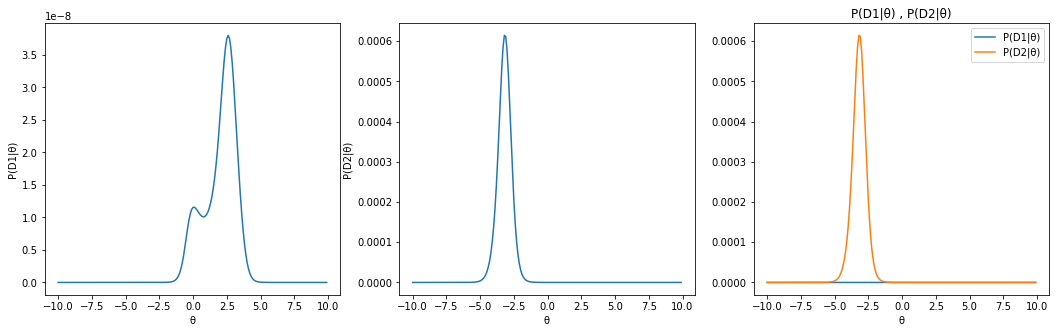

In [25]:
fig , axs = plt.subplots(1,3,figsize=(18,5) )
axs[0].plot(theta,product1)
axs[0].set(xlabel="θ",ylabel="P(D1|θ)")


axs[1].plot(theta,product2)
axs[1].set(xlabel="θ",ylabel="P(D2|θ)")

axs[2].plot(theta,product1,label='P(D1|θ)')
axs[2].plot(theta,product2,label='P(D2|θ)')
axs[2].set_title("P(D1|θ) , P(D2|θ)")
axs[2].set(xlabel="θ")

plt.legend()
plt.show()

## Παρατηρούμε ότι η p(D1|θ) λόγω των δειγμάτων που έχουμε , έχει 2 περιοχές με υψηλή πιθανότητα εμφάνισης , ενώ η p(D2|θ) που έχει δείγματα με πολύ μικρή απόκλιση "μαζεύεται" γύρω από μία τιμή. Βλέπουμε επίσης ότι η p(D2|θ) έχει πολύ μεγαλύτερες τιμές σε σχέση με την p(D1|θ).

## Υπολογισμός του log( p(Di|θ) )

In [26]:
# όμοια με πριν αρχικοποιώ άθροισμα αυτή τη φορά και αθροίζω ξεχωριστά για κάθε στοιχείο της κάθε κλάσης
sum1=0
sum2=0
for y in D1:
    sum1=sum1+np.log2(findpxth(y,theta))
for y in D2:
    sum2=sum2+np.log2(findpxth(y,theta))

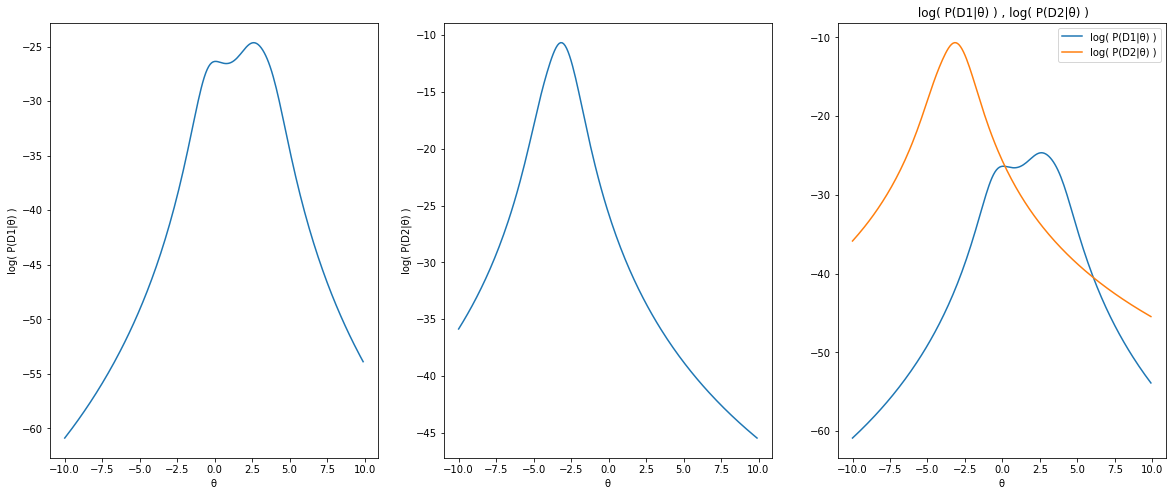

In [27]:
fig , axs = plt.subplots(1,3,figsize=(20,8) )
axs[0].plot(theta,sum1)
axs[0].set(xlabel="θ",ylabel="log( P(D1|θ) )")


axs[1].plot(theta,sum2)
axs[1].set(xlabel="θ",ylabel="log( P(D2|θ) )")

axs[2].plot(theta,sum1,label='log( P(D1|θ) )')
axs[2].plot(theta,sum2,label='log( P(D2|θ) )')
axs[2].set_title(" log( P(D1|θ) ) , log( P(D2|θ) )")
axs[2].set(xlabel="θ")

plt.legend()
plt.show()

## Οι γραφικές παραστάσεις διατηρούν την αρχική τους μορφή , εξ'αιτίας όμως του log η διαφορά μεταξύ p(D1|θ) και p(D2|θ) δεν είναι τόσο μεγάλη και είναι συγκρίσημα.

## Για να βρούμε τα θ hat υπολογίζουμε που μεγιστοποιείται η κάθε συνάρτηση

In [28]:
# Υπολογίζουμε το index του πίνακα που βρίσκεται το μέγιστο , έστω 140 και
# πολ/ζουμε με το step για να μας δώσει τη συντεταγμένη x δηλαδή 14. 
# Έπειτα προσθέτουμε την αρχή του διαστήματος , στην προκημένη περίπτωση το -10
# και έχουμε το σημείο που ψάχνουμε , στο παράδειγμά μας x=4
theta1= -10 +np.where(sum1==sum1.max())[0][0]*step
theta2= -10+ np.where(sum2==sum2.max())[0][0]*step

## Ορίζω συνάρτηση που να υπολογίζει την g(x)

In [29]:
# Επειδή είναι συνάρτηση , χρειάζεται πρόσβαση στις εξωτερικές μεταβλητές, 
# οπότε τις βάζω όρισμα για να μπορούν να γίνουν οι πράξεις
def g(x,pw1,pw2,theta1,theta2):
    return  np.log2(findpxth(x,theta1)) -np.log2(findpxth(x,theta2)) +np.log2(pw1) -np.log2(pw2)

## Ο κανόνας απόφασης είναι:
## όταν g(x)>0 , ω1 
## όταν g(x)<0 , ω2

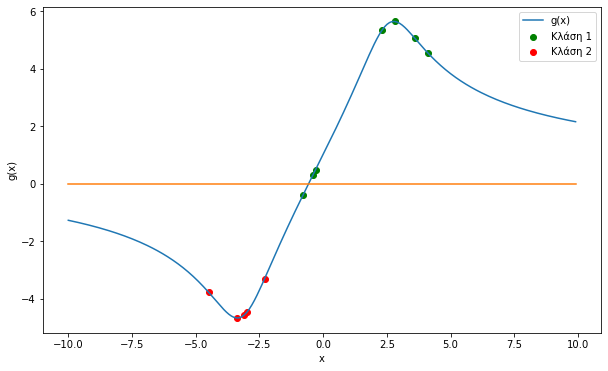

In [30]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(6)
plt.plot(theta,g(theta,pw1,pw2,theta1,theta2),label="g(x)")

plt.scatter(D1,g(D1,pw1,pw2,theta1,theta2),color='green',marker='o',label='Κλάση 1')
    
plt.scatter(D2,g(D2,pw1,pw2,theta1,theta2),color='red',marker='o',label='Κλάση 2')

x=np.zeros(200)
plt.plot(theta,x)
plt.legend()
plt.xlabel('x')
plt.ylabel('g(x)')
plt.show()

## Στο σχήμα φαίνεται η g(x) , τα δείγματα των κλάσεων , και η y=0 ορίζει τον κανόνα απόφασης. Τα δείγματα πάνω από την ευθεία ταξινομούνται στην κλάση 1 , ενώ αυτά κάτω στην κλάση 2. Παρατηρούμε ότι ένα στοιχείο της κλάσης 1 έχει ταξινομηθεί στην κλάση 2.

# Μέρος 2

## Ορίζω πάλι συνάρτηση που να υπολογίζει το p(θ)

In [31]:
def findpth(theta):
   return (  (1/(np.pi*10)) /( 1 + (theta/10)**2)   )

## Πλέον όλα είναι γνωστά , μένουν μόνο οι πράξεις για να υπολογίσω αυτά που χρειάζομαι

In [32]:
# τώρα δίνω όνομα στα product1 product2 για να χρησιμοποιηθούν αλλού
pd1th=product1
pd2th=product2
# υπολογίζω p(θ)
pth=findpth(theta)
# υπολογίζω p(D1) και p(D2) "ολοκληρώνοντας" , δηλαδή κάνοντας sum() εφόσον η μεταβλητή είναι διακριτή
# και όχι συνεχής. Παρόμοιος υπολογισμός ολοκληρώματος με την εργασία 1
pd1=(pd1th*pth).sum()*step
pd2=(pd2th*pth).sum()*step
# όλα γνωστά , κάνω τις πράξεις και υπολογίζω p(θ|D1) και p(θ|D2)
pthetad1=pd1th*pth/pd1
pthetad2=pd2th*pth/pd2

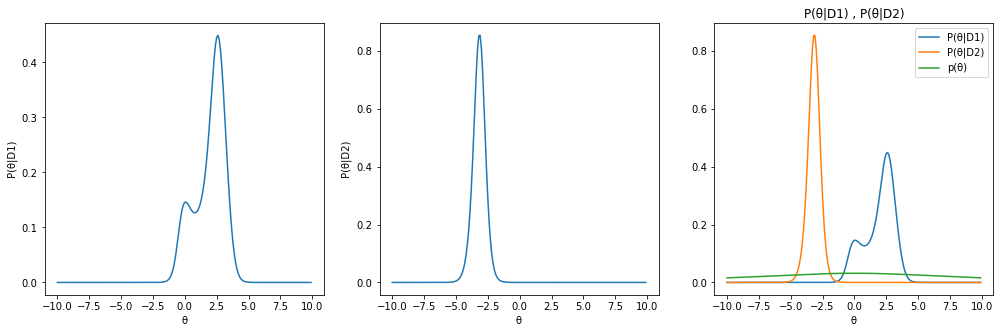

In [33]:
fig , axs = plt.subplots(1,3,figsize=(17,5) )

axs[0].plot(theta,pthetad1)
axs[0].set(xlabel="θ",ylabel=" P(θ|D1) ")


axs[1].plot(theta,pthetad2)
axs[1].set(xlabel="θ",ylabel=" P(θ|D2) ")

axs[2].plot(theta,pthetad1,label='P(θ|D1)')
axs[2].plot(theta,pthetad2,label='P(θ|D2)')
axs[2].plot(theta,pth,label='p(θ)')
axs[2].set_title("P(θ|D1) , P(θ|D2)")
axs[2].set(xlabel="θ")



plt.legend()
plt.show()

## Παρατηρώ ότι οι γραφικές παραστάσεις έχουν διατηρήσει την μορφή τους , όμως η p(θ|D2) είναι μεγαλύτερη από την p(θ|D1). Σε σχέση με την p(θ) , τα p(θ|D1) και p(θ|D2) έχουν πολύ μεγαλύτερη τιμή.

## Καινούρια συνάρτηση για υπολογισμό της p(x|D)

In [34]:
def findpxd(x,theta,pthetad,step):
    return ( findpxth(x,theta)*pthetad ).sum() * step

## Συνάρτηση για υπολογισμό της h(x)

In [35]:
# όπως και η g , η h είναι συνάρτηση και χρειάζεται εξωτερικές μεταβλητές για να γίνουν οι πράξεις
# οπότε τις δίνουμε ως όρισμα. έτσι όπως είναι γραμμένο όμως μπορεί να υπολογίζει 1 σημείο τη φορά
# αφού το όρισμα x μπαίνει στην συνάρτηση findpxd()
def h(x,D1,D2,pw1,pw2,theta,step,pthetad1,pthetad2):
  return np.log( findpxd(x,theta,pthetad1,step)) - np.log( findpxd(x,theta,pthetad2,step)) + np.log(pw1) -np.log(pw2)

In [36]:
# για να παρακάμψουμε αυτό το πρόβλημα ορίζουμε ένα μεταβλητή η οποία θα περιέχει για κάθε σημείο την τιμή της h σε αυτό
# με μία ανάθεση μέσα σε ένα for loop έχουμε το ζητούμενο
# h(theta[i],..) είναι η τιμή της h στο ζητούμενο σημείο

hplot=np.zeros(theta.size)
for i in range(0,theta.size):
    hplot[i]=h(theta[i],D1,D2,pw1,pw2,theta,step,pthetad1,pthetad2)

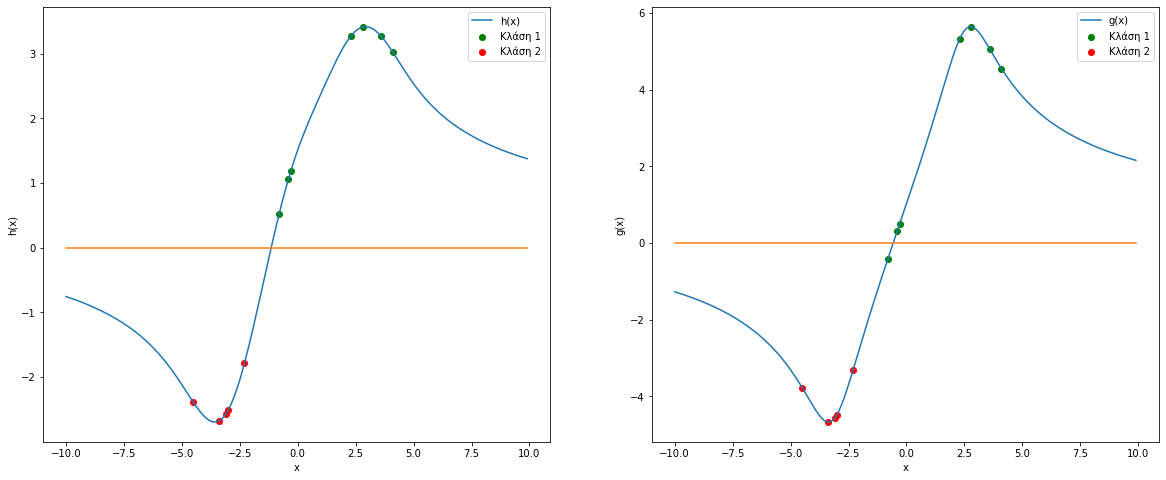

In [37]:
# λόγω της πολυπλοκότητας της h οι εντολές για τα plot των σημείων xi δεν μπορούν να γίνουν με μία εντολή
# οπότε τα κάνουμε scatter ένα ΄ένα. αυτό σημαίνει ότι δεν μπορούν να έχουν το ιδιο label οπότε "κλέβω" λίγο για να φανεί 
# ότι έχουν το ίδιο δίνοντας label μόνο σε ένα (στο πρώτο) στοιχείο της κάθε κλάσης
# κατά τα άλλα η υλοποίηση της h είναι παρόμοια με τα plot της g και copy paste για να φανεί από δίπλα η g

fig , ax = plt.subplots(1,2,figsize=(20,8) )
ax[0].plot(theta,hplot,label='h(x)')

# εδω χρειαστηκε να κανω int(round()) διότι η διαίρεση με το step δεν έδινε το αναμενομενο αποτελεσμα
# δηλαδη οταν εκανα 9.6/step βγαζε 95.99999

for y in D1:
    if (y==D1[0]):
        ax[0].scatter(y,hplot[int(round((y+10)/step,2))],color='green',label='Κλάση 1')
    else:
        ax[0].scatter(y,hplot[int(round((y+10)/step,2))],color='green')
    
for y in D2:
    if (y==D2[0]):
        ax[0].scatter(y,hplot[int(round((y+10)/step,2))],color='red',label='Κλάση 2')
    else:
        ax[0].scatter(y,hplot[int(round((y+10)/step,2))],color='red')
    

x=np.zeros(200)
ax[0].plot(theta,x)
ax[0].set(xlabel='x',ylabel='h(x)')
ax[0].legend(loc='best')

ax[1].plot(theta,g(theta,pw1,pw2,theta1,theta2),label="g(x)")

ax[1].scatter(D1,g(D1,pw1,pw2,theta1,theta2),color='green',marker='o',label='Κλάση 1')
    
ax[1].scatter(D2,g(D2,pw1,pw2,theta1,theta2),color='red',marker='o',label='Κλάση 2')

x=np.zeros(200)
ax[1].plot(theta,x)
ax[1].legend(loc='best')
ax[1].set(xlabel='x',ylabel='g(x)')


plt.show()

## Παρατηρούμε ότι η h(x) έχει κάνει σωστή ταξινόμηση σε όλα τα στοιχεία , ενώ η g(x) έχει μία αστοχία. Κατά τα άλλα οι υλοποιήσεις των ταξινομητών έχουν παρόμοιες γραφικές παραστάσεις.

## Καθώς η μέθοδος εκτίμησης παραμέτρων κατά Bayes χρησιμοποιεί τις εκ των υστέρων πιθανότητες είναι πιο κατάλληλη για ταξινόμηση σε σχέση με την MLE. 
## Αυτό φαίνεται διότι η P(D2|θ) είναι μεγαλύτερη κατά 4 τάξεις μεγέθους  από την P(D1|θ) και αυτό της δίνει μεγαλύτερο βάρος στην ταξινόμηση. Από την άλλη οι P(θ|D1) και P(θ|D2) έχουν ίδια τάξη μεγέθους και η ταξινόμηση είναι πιο "αμερόληπτη" .